In [1416]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 12 09:45:55 2021

@author: Lior Lansman , Bashar
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""
    Clause 1
"""
# read files
cities = pd.read_excel("/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/cities.xlsx")  # 2018 cities db
mapping = pd.read_excel("/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/mapping.xlsx", 'צורת יישוב') # mapping of cities file
crimes = pd.read_excel("/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/crimes.xlsx") # crimes data 2019 

# mapping = mapping.rename(columns={'  צורת יישוב  ': 'Current_form_of_settlement'})
# mapping = mapping.rename(columns={'Unnamed: 1': 'Symbol1'})
# mapping = mapping.rename(columns={'Unnamed: 2': 'Symbol2'})

# mapping = mapping.columns.values[0] = 'Signal'

# print(mapping)

# clean data : 
# delete column A,D from crimes
# del crimes['סמל יישוב']
del crimes['שנת הודעה']
# delete column B from cities
# del cities['סמל יישוב']
del cities['תעתיק']

# change all hebrew to english
# change cities column names to english:
cities = cities.rename(columns={'שם יישוב': 'City_name_hebrew','מחוז':'District','נפה':'Subdistrict','אזור טבעי':'Natural_place','מעמד מונציפאלי':'Municipal_status'
                                ,'שיוך מטרופוליני':'Metropolitan_Association','דת יישוב':'Religion_of_settlement','סך הכל אוכלוסייה 2018':'Total_Population_2018'
                                ,'יהודים ואחרים':'Jews_and_others','מזה: יהודים':'Jews_from_this','ערבים':'Arabs','שנת ייסוד':'Founding_year'
                                ,'צורת יישוב שוטפת':'Current_form_of_settlement','השתייכות ארגונית':'Organizational_affiliation','קואורדינטות':'Coordinate'
                                ,'גובה':'Height','ועדת תכנון':'Planning_Committee','מרחב משטרה':'Police_space','שנה':'Year','שם יישוב באנגלית':'English_locality_name'
                                ,'אשכול רשויות מקומיות':'Local_Authorities_Cluster','סמל יישוב': 'Symbol'})
# change crimes column names to english:
crimes = crimes.rename(columns={'סמל יישוב': 'Symbol','יישוב מחושב': 'Calculated_settlement','תאור קבוצה סטטיסטית':'Statistical_group_description'})

# dict from columns : 'City name hebrew', 'English locality name' in order to change the column  'Calculated settlement' to english in Crimes table
cities_names_dict = pd.Series(cities.English_locality_name.values,index=cities.City_name_hebrew).to_dict()

# change column Calculated settlement values in crime table to english by using the dict above:
crimes = crimes.replace({"Calculated_settlement": cities_names_dict})

# now we don't need 'City_name_hebrew' column in cities table anymore, so we drop it:
del cities['City_name_hebrew'] # Now there is no more hebrew content in cities table

# dict to change 'Statistical group description' column values in crimes table to english 
crimes_dict = {"-": "Other_offences","עבירות בטחון": "Security_offenses", "עבירות כלכליות": "Economic_offences", "עבירות כלפי המוסר":"Offences_towards_morality"
               ,"עבירות כלפי הרכוש":"Offences_against_property", "עבירות מין":"Sexual_offences","עבירות מרמה":"Fraudulent_offences"
               , "עבירות נגד אדם":"Offences_against_a_person","עבירות נגד גוף":"Offences_against_a_body","עבירות סדר ציבורי":"Public_order_offenses"
               ,"עבירות רשוי":"Licensing_violations","עבירות תנועה":"Moving_violation","שאר עבירות":"Other_offences","עבירות מנהליות":"Adminastrative_offences"
               ,"לא ידוע":"Other_offences","סעיפי הגדרה":"Definition clauses",'סמל יישוב': 'Symbol'}
crimes = crimes.replace({"Statistical_group_description": crimes_dict}) # Now there is no more hebrew content in crimes table

# remove rows with nulls in crimes table and cities table:
# cities = cities.dropna()
crimes = crimes.dropna()


crimes[2019] = crimes[2019].replace(to_replace = '-', value =0)
crimes[2018] = crimes[2018].replace(to_replace = '-', value =0)
crimes[2017] = crimes[2017].replace(to_replace = '-', value =0)
crimes[2016] = crimes[2016].replace(to_replace = '-', value =0)
crimes[2015] = crimes[2015].replace(to_replace = '-', value =0)
crimes[2014] = crimes[2014].replace(to_replace = '-', value =0)

crimes = crimes.groupby(["Calculated_settlement", "Statistical_group_description",'Symbol'], as_index=False).sum()
crimes.to_csv(r'/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/Crimes_File.csv')
cities.to_csv(r'/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/Cities_File.csv')

df_merge_col = pd.merge(crimes, cities, on='Symbol')


df_merge_col.to_csv(r'/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/df_merge_col.csv')

In [1417]:
## calculate Offences_percent for every settelment 
df_merge_col.insert(loc=0, column='Offences_percent', value= df_merge_col["Total"]/df_merge_col["Total_Population_2018"] )

In [1418]:
df_merge_col['Natural_place'] = df_merge_col['Natural_place'].replace(np.nan, 0)
df_merge_col['Subdistrict'] = df_merge_col['Subdistrict'].replace(np.nan, 0)

df_merge_col = df_merge_col[df_merge_col['Calculated_settlement'] != 'סביון']

df_merge_col.to_csv(r'/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/df_merge_col.csv')

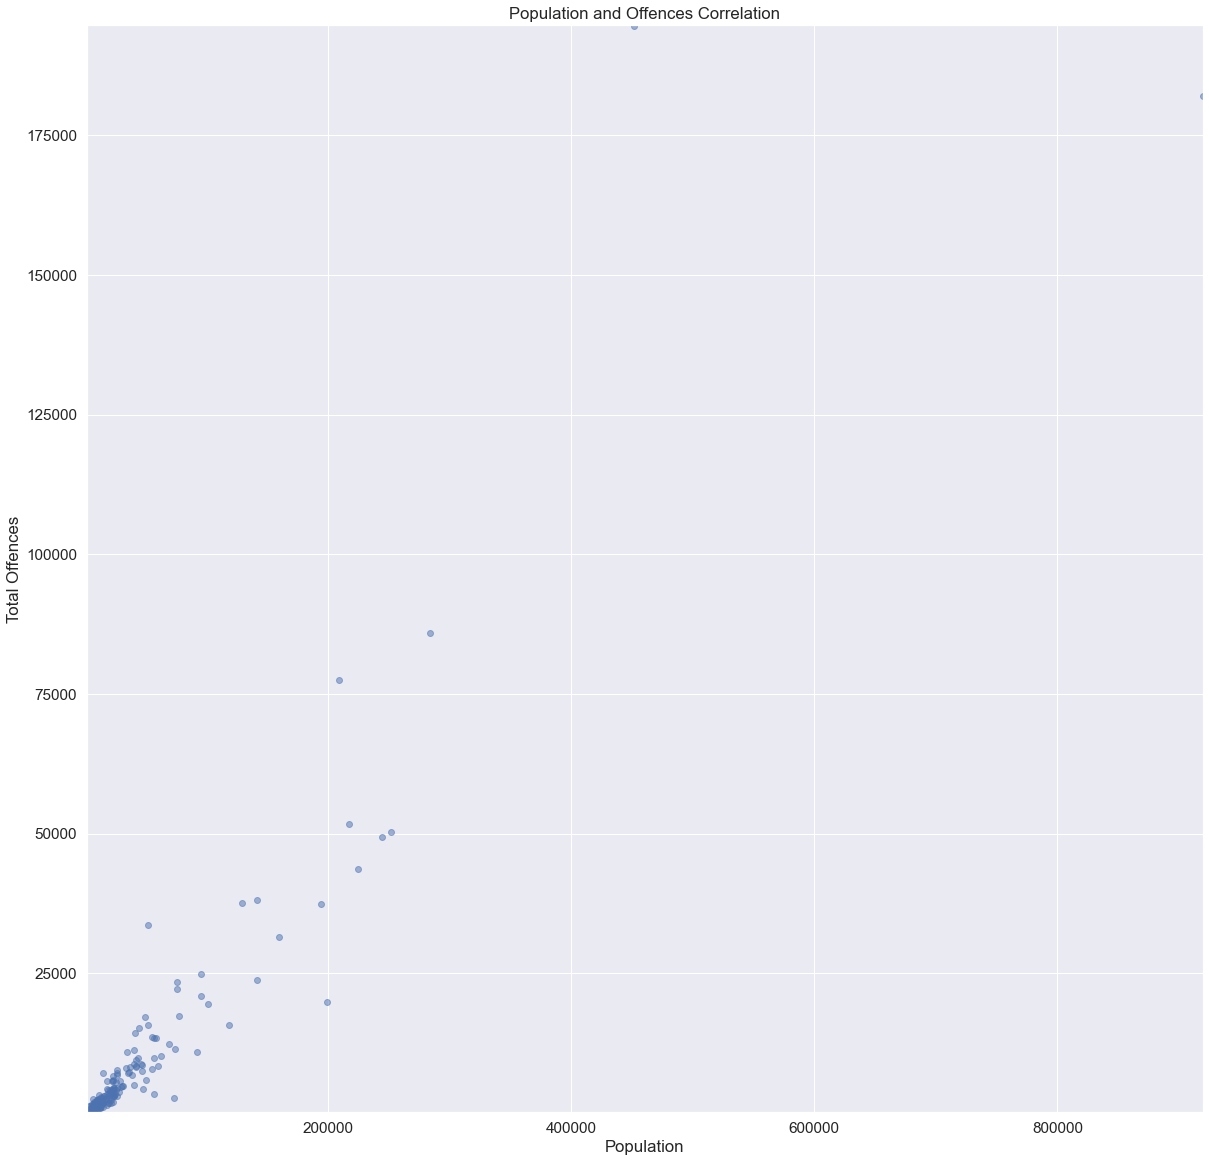

In [1419]:
"""
    Clause 2
"""

# graphs
# tables
# correlation matrix

df_new = df_merge_col[df_merge_col['Statistical_group_description'] == 'Total'] 


df_new.to_csv(r'/Users/basharegbariya/Documents/Education/1st year/Semester2/MachineLearning/Hw2/df_new.csv')


import matplotlib.pyplot as plt
  
# x axis values
x = df_new["Total_Population_2018"]
# corresponding y axis values
y = df_new["Total"]

text = df_new["Calculated_settlement"]

plt.figure(figsize=(20,20))

# plotting the points 
plt.scatter(x, y,   alpha=0.5 )
  
# for i in df_new:
#     plt.annotate(df_new["Calculated_settlement"].iloc[i], (df_new["Total_Population_2018"].iloc[i], df_new["Total"].iloc[i]))

# setting x and y axis range
plt.xlim(df_new["Total_Population_2018"].min(),df_new["Total_Population_2018"].max()+100)
plt.ylim(df_new["Total"].min(),df_new["Total"].max()+100)
  
# naming the x axis
plt.xlabel('Population')
# naming the y axis
plt.ylabel('Total Offences')
  
# giving a title to my graph
plt.title('Population and Offences Correlation')
  
# function to show the plot
plt.show()

# Clause 3

#### Data Processing

In [1420]:
# Droping all the rows doesn't contain one of the offences bellow in Statistical_group_description column.
df_merge_col_3 = df_merge_col 
indexNames = df_merge_col_3[(df_merge_col_3['Statistical_group_description'] != 'Economic_offences') 
                            & (df_merge_col_3['Statistical_group_description'] != 'Offences_towards_morality')
                            & (df_merge_col_3['Statistical_group_description'] != 'Offences_against_property')
                            & (df_merge_col_3['Statistical_group_description'] != 'Sexual_offences')
                            & (df_merge_col_3['Statistical_group_description'] != 'Fraudulent_offences')
                            & (df_merge_col_3['Statistical_group_description'] != 'Offences_against_a_person')
                            & (df_merge_col_3['Statistical_group_description'] != 'Offences_against_a_body')
                            & (df_merge_col_3['Statistical_group_description'] != 'Public_order_offenses')
                            & (df_merge_col_3['Statistical_group_description'] != 'Licensing_violations')
                            & (df_merge_col_3['Statistical_group_description'] != 'Moving_violation')
                            & (df_merge_col_3['Statistical_group_description'] != 'Security_offenses')].index
df_merge_col_3.drop(indexNames , inplace=True)

#### K-mean (first choosen algotirm)

In [1421]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

Data = {0: df_merge_col_3['Height'].tolist(),
        1: df_merge_col_3["Offences_percent"].tolist()}
  
df = pd.DataFrame(Data,columns=[0,1])

In [1422]:
def elbow_met(df):
    from scipy.spatial.distance import cdist
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [1423]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df = df.dropna(axis='columns')

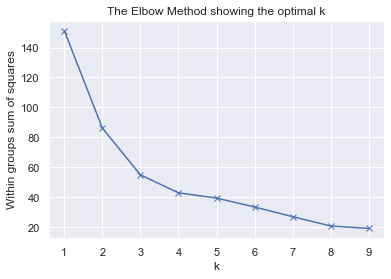

In [1424]:
# Finding the optimal K using the Elbow Method

from sklearn.cluster import KMeans
elbow_met(df)

In [1425]:
kmeans = KMeans(n_clusters=9).fit(df)
centroids = kmeans.cluster_centers_

In [1426]:
# Finding the number of points in every Cluster

import numpy as np
x = kmeans.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
zip(ii,y[ii])
print( ii,y[ii])

[0 1 2 3 4 5 6 7 8] [769 169 297  68 221  44 461  22  83]


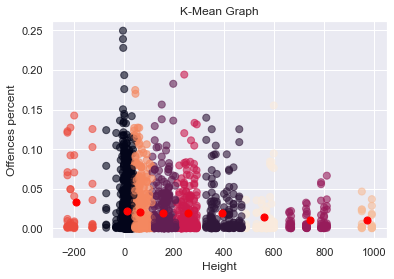

In [1427]:
# K-Mean Graph with pointed Clusters

plt.scatter(df[0], df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('K-Mean Graph')
plt.xlabel('Height') #x label
plt.ylabel('Offences percent') #y label
plt.show()

#### GMM (second choosen algotirm)

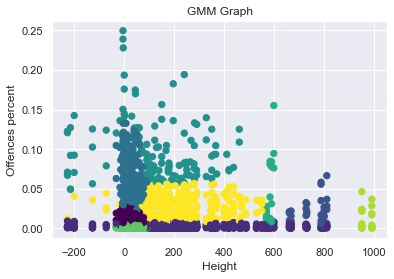

In [1428]:
# GMM Graph with colored Clusters

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=9).fit(df)
labels = gmm.predict(df)
plt.title('GMM Graph')
plt.xlabel('Height') #x label
plt.ylabel('Offences percent') #y label
plt.scatter(df[0], df[1], c=labels, s=40, cmap='viridis');

In [1429]:
# Updating our data frame with K-Mean clustring result for Clause 6+7 use

df_merge_col_3['result'] = kmeans.labels_.tolist()

*************************
        
    The relation that we try to find between cities and crimes, is Height of settlement to the Offences percent.
    For making our results more informative we define Offences percent, which is the aggregation of the Offences in years 2014-2018 divided by the population.
    Not all the Offences types was taken into consediration in the calculation, we choose the most informative and accordingly to the requirments in Cluase 6.

    We choose to run two algoritems on our data:
        1- K-Mean
        2- GMM

    Next step was to try understand which one of the two algorithms can support our research question (is there relation between Height of settlement to the Offences percent).
    And by looking at the two graphs above we can see that K-Mean Graph was more clear, and we can see from cluster 1 and so on the we can see that the number of Offences is
    decreasing, and we can see this crealrer than in the GMM Graph, where the clusters wasn't informative enough for us.

    So we choose K-Mean as our appropriate algorithm.
    
*************************

# Clause 6

#### Data Processing

In [1430]:
df_merge_col_6 = df_merge_col_3

# Deleting all unwanted columns (will merge this columns later)

del df_merge_col_6['District']
del df_merge_col_6['Subdistrict'] 
del df_merge_col_6['Natural_place'] 
del df_merge_col_6['Municipal_status']
del df_merge_col_6['Metropolitan_Association'] 
del df_merge_col_6['Religion_of_settlement']
del df_merge_col_6['Total_Population_2018'] 
del df_merge_col_6['Jews_and_others'] 
del df_merge_col_6['Jews_from_this']
del df_merge_col_6['Arabs'] 
del df_merge_col_6['Founding_year'] 
del df_merge_col_6['Current_form_of_settlement']
del df_merge_col_6['Organizational_affiliation'] 
del df_merge_col_6['Coordinate']
del df_merge_col_6['Height']
del df_merge_col_6['Planning_Committee']
del df_merge_col_6['Police_space']
del df_merge_col_6['Year']
del df_merge_col_6['English_locality_name']
del df_merge_col_6['Local_Authorities_Cluster']
del df_merge_col_6['Offences_percent']

In [1431]:
# Method to calculate wokring hours according to the offence type

def hourlyWorkingForCrime(crimeType, totalCrimes):
    if crimeType == "Security_offenses":
        res = 20 * totalCrimes
    elif crimeType == "Economic_offences":
        res = 5 * totalCrimes
    elif crimeType == "Offences_towards_morality":
        res = 15 * totalCrimes
    elif crimeType == "Offences_against_property":
        res = 10 * totalCrimes
    elif crimeType == "Sexual_offences":
        res = 35 * totalCrimes
    elif crimeType == "Fraudulent_offences":
        res = 25 * totalCrimes
    elif crimeType == "Offences_against_a_person":
        res = 40 * totalCrimes
    elif crimeType == "Offences_against_a_body":
        res = 30 * totalCrimes
    elif crimeType == "Public_order_offenses":
        res = 1 * totalCrimes
    elif crimeType == "Licensing_violations":
        res = 1 * totalCrimes
    elif crimeType == "Moving_violation":
        res = 2 * totalCrimes
    else:
        res = 0
    return res


# Deleting rows that contain {Total, Adminastrative_offences, Definition clauses, Other_offences} in Statistical_group_description column

crimes_filtered = df_merge_col_6[df_merge_col_6['Statistical_group_description'] != 'Total']
crimes_filtered = crimes_filtered[crimes_filtered['Statistical_group_description'] != 'Adminastrative_offences']
crimes_filtered = crimes_filtered[crimes_filtered['Statistical_group_description'] != 'Definition clauses']
crimes_filtered = crimes_filtered[crimes_filtered['Statistical_group_description'] != 'Other_offences']


# Deleting all unwanted columns

del crimes_filtered['Total']
del crimes_filtered[2019]


# Defining new column 'Offenses_sum', calculating the sum of offences from year 2014-2018

crimes_filtered.insert(loc=2, column='Offenses_sum', value=crimes_filtered[2018]+crimes_filtered[2017]+crimes_filtered[2016]+crimes_filtered[2015]+crimes_filtered[2014])


# Defining new column 'Calculated_Working_Hours', calculating the total working hours per offence according to 'Offenses_sum'

crimes_filtered.insert(loc=2, column='Calculated_Working_Hours', value=crimes_filtered.apply(lambda x: hourlyWorkingForCrime(x['Statistical_group_description'], x['Offenses_sum']), axis=1))


# Group by 'Calculated_settlement' to sum the 'Calculated_Working_Hours'

crimes_filtered = crimes_filtered.groupby(['Calculated_settlement','Symbol','result'], as_index=False).sum()


# Merging 'cities' table, to use dimographic data for tranning

crimes_filtered = pd.merge(crimes_filtered, cities,how="left", on='Symbol')


## Deleting cities with Symbol lower than 0, because we notice that they lack information

crimes_filtered = crimes_filtered[crimes_filtered['Symbol'] > 0]


# For simplicity years column deleted

del crimes_filtered[2018]
del crimes_filtered[2017]
del crimes_filtered[2016]
del crimes_filtered[2015]
del crimes_filtered[2014]


## Columns that contain uninformative data was deleted, (uninformative data: column that must of the it's values are empty, or it's not numeric)

del crimes_filtered['Symbol']
del crimes_filtered["Local_Authorities_Cluster"]
del crimes_filtered["English_locality_name"]
del crimes_filtered["Year"]
del crimes_filtered["Organizational_affiliation"]
del crimes_filtered["Founding_year"]
del crimes_filtered["Metropolitan_Association"]


# Columns below was updated with 0 values in the empty cells 

crimes_filtered['Natural_place'] = crimes_filtered['Natural_place'].replace(np.nan, 0)
crimes_filtered['Jews_and_others'] = crimes_filtered['Jews_and_others'].replace(np.nan, 0)
crimes_filtered['Jews_from_this'] = crimes_filtered['Jews_from_this'].replace(np.nan, 0)
crimes_filtered['Arabs'] = crimes_filtered['Arabs'].replace(np.nan, 0)


# New column added 'percent', it contain the Offenses_sum divided by Calculated_Working_Hours (will use this calculation to decide the labels)

crimes_filtered.insert(loc=2, column='percent', value= crimes_filtered["Offenses_sum"]/crimes_filtered["Calculated_Working_Hours"] )


# Method that contain threshholds, decided by us, accepts percent and returns the label according to our calculation

def calculateThreshhold(percent):
    if percent < 0.08298530549110596:
        res = 0
    elif 0.08298530549110596 < percent < 0.08769418376544191:
        res = 1
    else:
        res = 2
    return res


# New column 'label' contain the resulted output of the defined method 'calculateThreshhold' 

crimes_filtered.insert(loc=0, column='label', value=crimes_filtered.apply(lambda x: calculateThreshhold(x['percent']), axis=1))

In [1432]:
# clause 6
X = crimes_filtered.iloc[:, 3:20].values
y = crimes_filtered.iloc[:, 0].values

#### Random Forest Clasification Algoritim 

In [1433]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train_[:,:15]
X_test = X_test_[:,:15]

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Clause 6 - Simble confusion matrix: ')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Clause 6 - Model Accuracy is: ',accuracy_score(y_test, y_pred))

Clause 6 - Simble confusion matrix: 
[[15  0  0]
 [ 0 13  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.93      0.90        14
           2       0.90      0.82      0.86        11

    accuracy                           0.93        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40

Clause 6 - Model Accuracy is:  0.925


#### Algoritim Results (presented by Confusion Matrix, Scatter Plot)

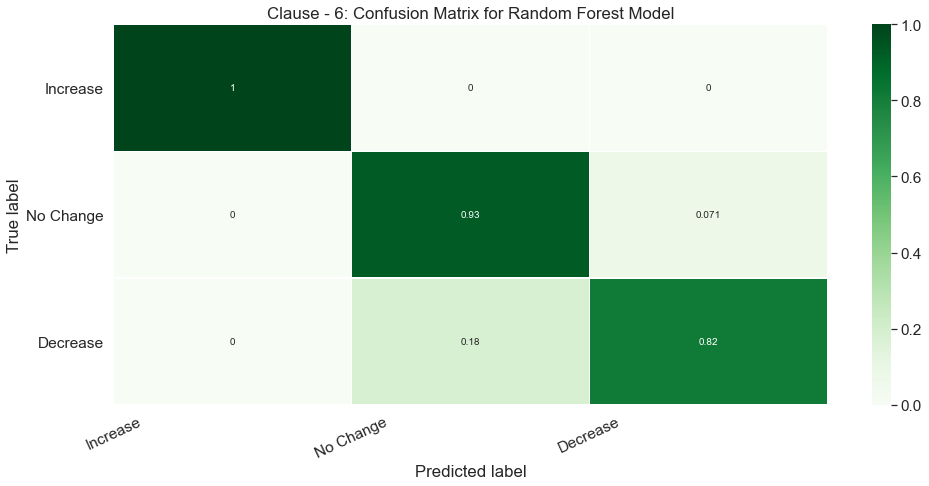

[0 2 0 1 0 2 1 2 2 2 1 2 1 0 0 0 1 2 1 1 2 0 1 2 0 0 0 2 0 1 0 0 2 1 0 1 1
 0 1 1]
[0 1 0 1 0 2 1 2 2 2 1 2 2 0 0 0 1 1 1 1 2 0 1 2 0 0 0 2 0 1 0 0 2 1 0 1 1
 0 1 1]


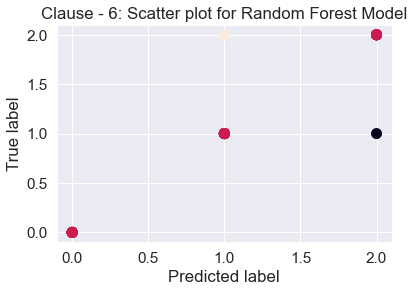

In [1434]:
######
import matplotlib.pyplot as plt

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Increase', 'No Change', 'Decrease']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Clause - 6: Confusion Matrix for Random Forest Model')
plt.show()

########

x_ = X_test_[:,15:16]
x_ = y_test
y_ = y_pred
print(x_)
print(y_)

# x = [0,2,4,6,8,10]
# y = [0]*len(x)
# s = [20*4**n for n in range(len(x))]
# plt.scatter(x,y,s=50)
# plt.show()

plt.scatter(y_, x_,s=100, c = (x_ - y_))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Clause - 6: Scatter plot for Random Forest Model')
plt.show()

*************************
    
    In this question we did many data proccessin, because we wanted to make our data clear and vaild for trainning and testing for our Classification algorithem.
    (all the procces done on the data descriped in above Data Processing cell)

    The algorithem we choose to classify our data in RandomForest.

    Our data include the following columns:

    'label', 'Calculated_settlement', 'percent','Calculated_Working_Hours', 'Offenses_sum', 'District', 'Subdistrict',
    'Natural_place', 'Municipal_status', 'Religion_of_settlement','Total_Population_2018', 'Jews_and_others', 'Jews_from_this', 'Arabs',
    'Current_form_of_settlement', 'Coordinate', 'Height','Planning_Committee', 'Police_space'

    The column 'label' is what we calculated already as the class for every row. it has 3 values (0,1,2)

    Other columns are taken from cities.

    After Data Processing we got about 200 settlement as data.

    We configure the algorithem to devide our data set as .8 trainning, .2 as test data.

    We keep the default gini criterion, because other criterions didn't help to get more accurate modle.

    We can see that our accuracy is 0.925, we can see in our scatter plot and confusion matrix that we have errors in the modle to decide for police what to do.

    Errors:
    
        1- For the case that police need to decrease, our modle returns that no change should be done in 0.18 of our predictions.

        2- For the case that police dont need to do any change, our modle returns that there's need to decrease in 0.071 of our predictions.
    

*************************

# Clause 7


In [1435]:
# clause 7
X = crimes_filtered.iloc[:, 2:20].values

#### Random Forest Clasification Algoritim 

In [1436]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train_[:,:15]
X_test = X_test_[:,:15]

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Clause 7 - Simble confusion matrix: ')
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))
print('Clause 7 Model Accuracy is: ',accuracy_score(y_test, y_pred))

Clause 7 - Simble confusion matrix: 
[[15  0  0]
 [ 0 14  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        11

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40

Clause 7 Model Accuracy is:  0.95


#### Algoritim Results (presented by Confusion Matrix, Scatter Plot)

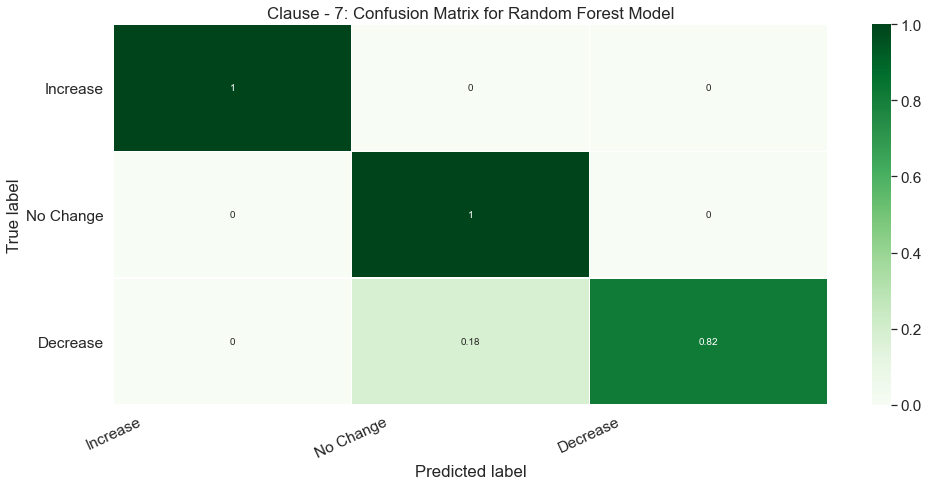

[0 2 0 1 0 2 1 2 2 2 1 2 1 0 0 0 1 2 1 1 2 0 1 2 0 0 0 2 0 1 0 0 2 1 0 1 1
 0 1 1]
[0 1 0 1 0 2 1 2 2 2 1 2 1 0 0 0 1 1 1 1 2 0 1 2 0 0 0 2 0 1 0 0 2 1 0 1 1
 0 1 1]


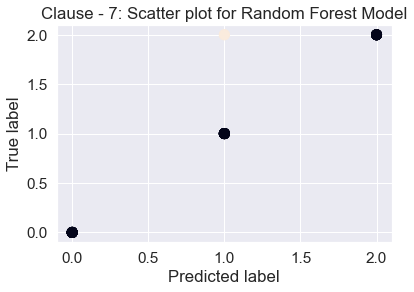

In [1437]:
######
import matplotlib.pyplot as plt

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Increase', 'No Change', 'Decrease']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Clause - 7: Confusion Matrix for Random Forest Model')
plt.show()

########

x_ = X_test_[:,15:16]
x_ = y_test
y_ = y_pred
print(x_)
print(y_)

# x = [0,2,4,6,8,10]
# y = [0]*len(x)
# s = [20*4**n for n in range(len(x))]
# plt.scatter(x,y,s=50)
# plt.show()

plt.scatter(y_, x_,s=100, c = (x_ - y_))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Clause - 7: Scatter plot for Random Forest Model')
plt.show()

*************************
    
    In this question we did use the same algorithem and did the same as the previous one (Clause 6)
    The only diference is that we added another feature to our data, called 'result' column.
    
    This feature column contain the numbers 0-8, that indicates the number of the classifier that the row mapped to in question 3.
    
    With the existed data + the feature, we ran the same RandomForest algorithem, with the same configuration, and we got better accuracy.
    
    Our Model Accuracy is:  0.975 in this Clause and it's higher than what we got previously without this feature (0.925). 
    
    And we can see that for now we are getting less error rate. 
    
    We only have the following error, but with smaller ration, which is consider better modle.
    
    Errors:
    
        1- For the case that police need to decrease, our modle returns that no change should be done in 0.091 of our predictions.
    

*************************